[Github Source Link](https://github.com/CristiVlad25/ml-sklearn)

### Importing libraries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import mglearn


%matplotlib inline

In [2]:
cancer = load_breast_cancer()
print (cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### Few points about the dataset

- 569 instances
- digitized imgs of breast cancer tumors
- FNAs : Fine Needle Aspirates 
- 30 features
- each sample is labled: **Malignant or Benign**

In [3]:
print (cancer.feature_names)
print (cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


#### This dataset comes preloaded with scikit-learn

**It's already clean and pre-processed ready to be fed into the algorithms**

```cancer.data``` contains data of attributes

```cancer.target``` contains data of target vars

In [4]:
type(cancer.data)

print(cancer.data[0])

print(cancer.target[0])

[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]
0


In [5]:
cancer.data.shape

(569, 30)

### Process Outline

- Get data (pre-process it)
- Pick an algorithm (classifier)
- Train the algorithm. Verify accuracy. Optimize
- Predict


### KNN Algorithm

In [6]:
!pip install mglearn

You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


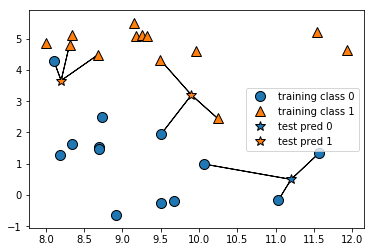

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### KNN is easy to understand and implement

It works well with smaller datasets, with fewer features
It does not work well with bigger datasets with 100s of features. **It becomes slow**


In [8]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

print (len(x_train) == len(y_train) and len(x_test) == len(y_test))

print(len(x_train)/len(cancer.data))


knn = KNeighborsClassifier()

knn.fit(x_train, y_train)


True
0.7486818980667839


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

By default train_test_split splits 75% of the data into test and 25% of the data into train

In [9]:
print ("Accuracy of KNN n-5 on the training set: {:.2f} %".format(knn.score(x_train,y_train)*100))

print ("Accuracy of KNN n-5 on the test set: {:.2f}%".format(knn.score(x_test,y_test)*100))


Accuracy of KNN n-5 on the training set: 94.60 %
Accuracy of KNN n-5 on the test set: 93.01%


#### Can we tune in the parameters of the KNN algo to predict more accurately?

No of neighbors: test usinga range of neighbors (1-10)

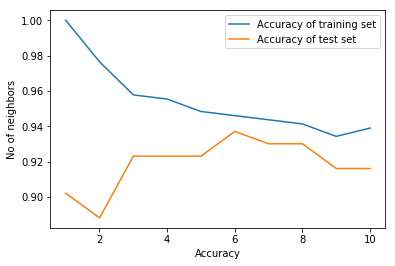

In [10]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

# lists for storing accuracies

training_accuracies = []
test_accuracies = []

neighbor_settings = range(1,11)

for n_neighbors in neighbor_settings:
    cif = KNeighborsClassifier(n_neighbors=n_neighbors)
    cif.fit(x_train, y_train)
    training_accuracies.append(cif.score(x_train, y_train))
    test_accuracies.append(cif.score(x_test, y_test))
    
    
# visualize the data

plt.plot(neighbor_settings, training_accuracies, label = "Accuracy of training set")
plt.plot(neighbor_settings, test_accuracies, label = "Accuracy of test set")
plt.xlabel("Accuracy")
plt.ylabel("No of neighbors")
plt.legend()


** Accuracy of test set is best (94%) while using 6 neighbors **


### Supervised Learning

There are 2 types of Supervised Learning:

**1. Classification (categorical data)**
    - Binary (tumor: bening, malignant)
    - Multiclass classification (books: physics, math, cs, history)
    - example algorithms: KNN, Linear Models, Decision Trees, SVMs etc.
**2. Regression (continuous data)**
    - predicting income, price of stock, age and other continuous data
    - example algorithms: KNN, Linear Models, Decision Trees, SVMs etc.

---

Linear Models like LinReg, LogReg, Lasso, Ridged etc. make predictions acc to a linear function of input features.

### Logistic Regression

In [11]:
cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)

# code is almost same as KNN

log_reg_classifier = LogisticRegression()

log_reg_classifier.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
print ("Accuracy of LogReg on the training set: {:.2f} %".format(log_reg_classifier.score(x_train,y_train)*100))

print ("Accuracy of LogReg on the test set: {:.2f} %".format(log_reg_classifier.score(x_test,y_test)*100))

Accuracy of LogReg on the training set: 95.31 %
Accuracy of LogReg on the test set: 95.80 %


#### Can we optimize the LogRegClassifier to get better results?

Log Reg uses **Regularization** to avoid overfitting

Thare are 2 types of Regularization

- L1: assumes only a few features are important
- L2: does not assume that

L2 is the default one


Strength of Regularization: Parameter **'C'**

- lower C : causes our classifier to adjust to majority of data points
- higher C : emphasizes on correct classification of each data point

**By default the value of C is 1**


#### Higher C Value

In [13]:
log_reg_100 = LogisticRegression(C=100)

log_reg_100.fit(x_train, y_train)

print ("Accuracy of LogReg on the training set: {:.2f} %".format(log_reg_100.score(x_train,y_train)*100))

print ("Accuracy of LogReg on the test set: {:.2f} %".format(log_reg_100.score(x_test,y_test)*100))

Accuracy of LogReg on the training set: 97.18 %
Accuracy of LogReg on the test set: 96.50 %


    There is an increase in both accuracies

    Also the gap bw the testing and training accuracies increase as well

    This means we are moving away from an underfit model
    
    Thus performance has been improved

In [14]:
log_reg_001 = LogisticRegression(C=0.01)

log_reg_001.fit(x_train, y_train)

print ("Accuracy of LogReg on the training set: {:.2f} %".format(log_reg_001.score(x_train,y_train)*100))

print ("Accuracy of LogReg on the test set: {:.2f} %".format(log_reg_001.score(x_test,y_test)*100))

Accuracy of LogReg on the training set: 93.43 %
Accuracy of LogReg on the test set: 93.01 %


    Accuracy is lowered
    
    Gap is also less
    
    Performance is worse

### Linear Models (in general)

    y = wx + b
    
- w: slope or coeff, accessed via .coeff____ 
- b: offset or intercept, accessed via .intercept____
- w and b are learned params
- y is the prediction

#### For LogReg specifically:

    y = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b > 0



w[0]: 0.393906  b: -0.031804


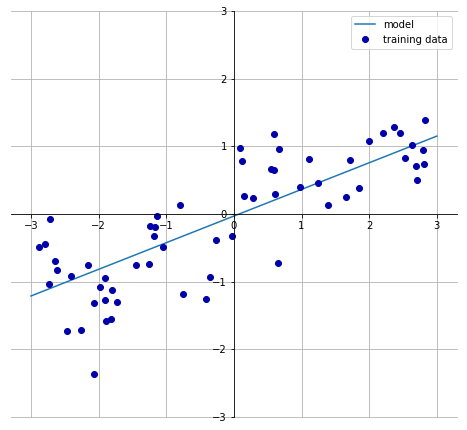

In [15]:
mglearn.plots.plot_linear_regression_wave()

#### In LogReg there is and addition of ```>0``` condition

We set a threshold value of predn

#### Let'sexplore the Learn Params for the diff C values we had


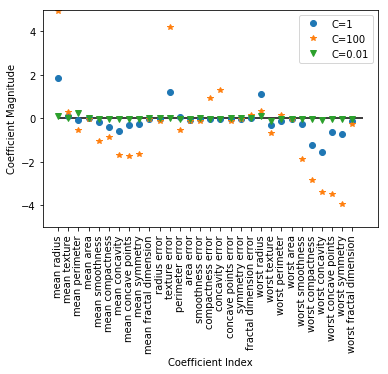

In [16]:
plt.plot(log_reg_classifier.coef_.T, 'o', label = 'C=1')
plt.plot(log_reg_100.coef_.T, '*', label = 'C=100')
plt.plot(log_reg_001.coef_.T, 'v', label = 'C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])

plt.ylim(-5,5)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

C=0.01: denotes stronger Regularization, It shifts coeff towards 0

C=100: focuses on correct classification

### Decision Trees

each node is decided on maximum information gain

![decision tree](https://camo.githubusercontent.com/1f868438e77459ed99da3c4b86b38300ef0ff8eb/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f662f66332f434152545f747265655f746974616e69635f7375727669766f72732e706e67)

Feature importances: [ 0.  1.]


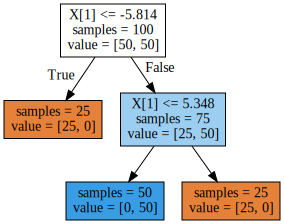

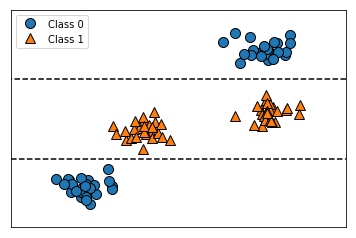

In [17]:
mglearn.plots.plot_tree_not_monotone()

In [18]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)

print ("Accuracy of DT on the training set: {:.2f} %".format(tree.score(x_train,y_train)*100))

print ("Accuracy of DT on the test set: {:.2f} %".format(tree.score(x_test,y_test)*100))

Accuracy of DT on the training set: 100.00 %
Accuracy of DT on the test set: 93.71 %


Accuracy of training subset is 100%

This is bcoz all the leaves are pure

The branching went all the way down until algorithm could memorize and fit all the labels

This is **Overfitting**

This happened because the DT was **unrestricted** and the branching went all the way down until it perfectly fit
the training data

We have to limit the depth of the DT, which in turn will limit its complexity

There is a technique called **Pruning** which prevents over-fitting

2 types of Pruning

1. Pre pruning: we stop the creation of the tree at an earlier stage. We dont let it develop completely.
    We can limit the max depth or max leaves or specify min number of points for a node so that it can keep splitting
2. Post pruning: we allow the tree to get built and then remove irrelevant nodes, nodes which contain little information


#### Pre Pruning with max_depth = 4

In [19]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

    This is better

    Accuracy on training subset is reduced, thus overfitting is reduced

    Accuracy on test is increased

In [20]:
!pip install graphviz

You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
import graphviz

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file = 'cancertree.dot', class_names = ['malignant', 'bening'], 
                feature_names = cancer.feature_names, impurity = False, filled = True)

#### Visualize the file:

![tree](cancertree.png)

This tells us how the predictions are made

Depth = 4

worst radius is at the root. So we can get an idea about the importance of this feature

Then we have branching into worst concave points and texture error

Each feature in a DT carries a certain weight

In [22]:
print ("Feature importances: {}".format(tree.feature_importances_))
type(tree.feature_importances_)

print(cancer.feature_names)

Feature importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


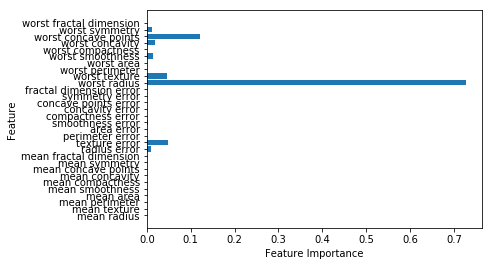

In [23]:
n_features = cancer.data.shape[1]

plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

worst radius carries a lot of wt, so its at the root

then we have worst concave points, texture error

#### Advantages of DTs

- easy to view and understand
- unlike some other ML algos, there is no need to pre process, normalize, scale, or standardize the features

We dont have to bring features to same scale as in this algo the features are processed individually

#### Params to work with

- max_depth
- min_samples_leaf, max_samples_leaf
- max_leaf_nodes

#### Disadv

- tendency to overfit (even if pre pruned)
- poor generalization

#### Ensembles: combines multiple ML models into a more powerful model

### Random Forests

Ensembles of trees are preferred over a single DT Classifier

RF: collection of DTs

**How are RFs better than a single DT**

- a single DT is good for prediction, but is prone to overfit a part of data
- combining multiple DTs retains the predictive ability, and reduces overfitting by averaging the results
- RF applies **randomness** while building each DT. So each DT is diff
- averaging is done afterwards

In [24]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

random_forest_classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)

random_forest_classifier.fit(x_train, y_train)

print ("Accuracy of RF on the training set: {:.2f} %".format(random_forest_classifier.score(x_train,y_train)*100))

print ("Accuracy of RF on the test set: {:.2f} %".format(random_forest_classifier.score(x_test,y_test)*100))

Accuracy of RF on the training set: 100.00 %
Accuracy of RF on the test set: 97.20 %


There is a feature in RF called ```max_features```

This controls the randomness of each DT

or we can also apply pre pruning

There is a param ```feature_importances``` which helps us understand the wt each feature carries in the
decision making process

Since we are dealing with multiple DTs, randomness applies to each of them. So feature_importances in RF is
more representattive than in single DT

In the single DT we built earlier, the feature worst radius carried a significantly higher weight than the others

Lets see how it looks like for RF

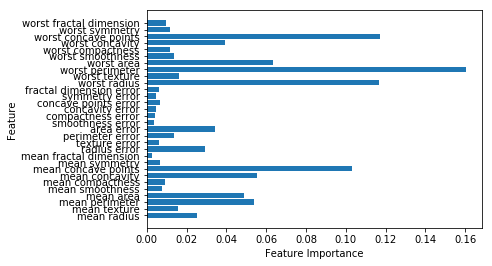

In [25]:
n_features = cancer.data.shape[1]

plt.barh(range(n_features), random_forest_classifier.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

    Now many of other features have a non-zero contribution, they play a heavier role in decision making
    
    Thus RF provides a more informed choice
    
#### Advantages of RF

- powerful and widely implemented, do not require much tuning of parameters
- dont require scaling of data
- make up for the deficiencies of DTs

#### Parameters to tune:

- n_jobs: number of cores to use (-1 for all cores)
- n_estimators: how many trees to use (more is always better). more trees tend to reduce overfitting of the algo
    But we also have to trade off bw training time and memory allocation of the algo
    Higher n_estimators drain more computer resources
- max_depth, for pr pruning
- max_features: determines randomness for each tree
    - default value: sqrt(n_features) for classification
    - default value: log2(n_features) for regression

#### Disadv

- not so good performance on high dimensional and sparse data(text data)
- need more time and memory for training process compared to othet models
- cannot be visualized as well as a single DT

### Neural Networks

Linear models:

    y = w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b
    
We are going to train a **Multi layer Perceptron (MLP)** for classifying tumor samples

#### Feed Forward NN : Flow of info only goes forward, in one direction

This is unlike Back Propogation

MLP can be viewed as generalization of linear models that go through multiple stages of processing
to reach a decision or prediction

Decision/Prediction is based on weighted sum of features : w[0]x[0] + w[1]x[1] + ... + w[p]x[p]

Let's visualize this

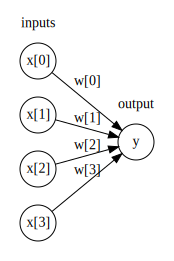

In [26]:
mglearn.plots.plot_logistic_regression_graph()

This is how LogReg works, the output is y here

Whats diff about MLP?

    - Weights are calculated multiple times
    


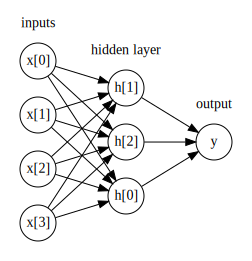

In [27]:
mglearn.plots.plot_single_hidden_layer_graph()

This is a MLP with a single hidden layer

This is a Simple NN

A NN with multiple HL is called a **Deep Neural Network**



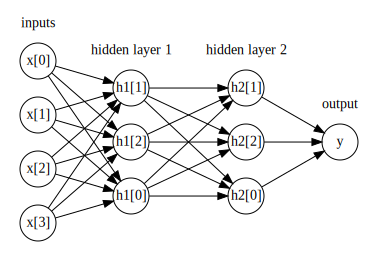

In [28]:
mglearn.plots.plot_two_hidden_layer_graph()

** What differenciates NN from Linear Models is that once we compute a weighted sum for a hidden unit, we are going to apply a non linear function to the result**

2 most applied functions are: RELU and TANH

RELU : Rectified Linear Unit

The result is used to calculate the output, y

Applying these non linear functions makes the NN capable of more complicated computations

#### Train a NN on cancer dataset

In [29]:
from sklearn.neural_network import MLPClassifier

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42)

mlp.fit(x_train, y_train)

print ("Accuracy of MLP on the training set: {:.2f} %".format(mlp.score(x_train,y_train)*100))

print ("Accuracy of MLP on the test set: {:.2f} %".format(mlp.score(x_test,y_test)*100))

Accuracy of MLP on the training set: 90.61 %
Accuracy of MLP on the test set: 88.11 %


Accuracy is pretty low!

This may be due to scaling of data



#### Improving performance

Let's look at the upper limit of each feature


In [30]:
print ("The max each feature: {}".format(cancer.data.max(axis=0)))

The max each feature: [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


We have to scale these features to improve our performance

**Features should have zero mean and unit variance**

We can use the standard scalar class from sklearn preprocessing module for this

We have to only scale the x data as the y data has only 0 and 1 so no need of scaling

Max iteration no: by default it is 200, but it is not enough to reach convergence

In [31]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x_train_scaled = scalar.fit(x_train).transform(x_train)

x_test_scaled = scalar.fit(x_test).transform(x_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(x_train_scaled, y_train)

print ("Accuracy of MLP on the training set: {:.2f} %".format(mlp.score(x_train_scaled, y_train)*100))

print ("Accuracy of MLP on the test set: {:.2f} %".format(mlp.score(x_test_scaled, y_test)*100))

Accuracy of MLP on the training set: 99.53 %
Accuracy of MLP on the test set: 95.80 %


Can we improve performance more?

In [32]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

There are so many params

for eg, there is solver='adam' for the optimization of weights

adam is default.There is SGD: Stochastic Gradient Descent

We can change no of hidden layers

activation function: we can shift bw relu and tanh

alpha is the Strength of Regularization

In [33]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)

mlp.fit(x_train_scaled, y_train)

print ("Accuracy of MLP on the training set: {:.2f} %".format(mlp.score(x_train_scaled, y_train)*100))

print ("Accuracy of MLP on the test set: {:.2f} %".format(mlp.score(x_test_scaled, y_test)*100))

Accuracy of MLP on the training set: 98.83 %
Accuracy of MLP on the test set: 97.20 %


    We dec that gap bw test and train accuracy
    accuracy also inc
    Thus performance is better
    
#### Visualize Learning Process for NN

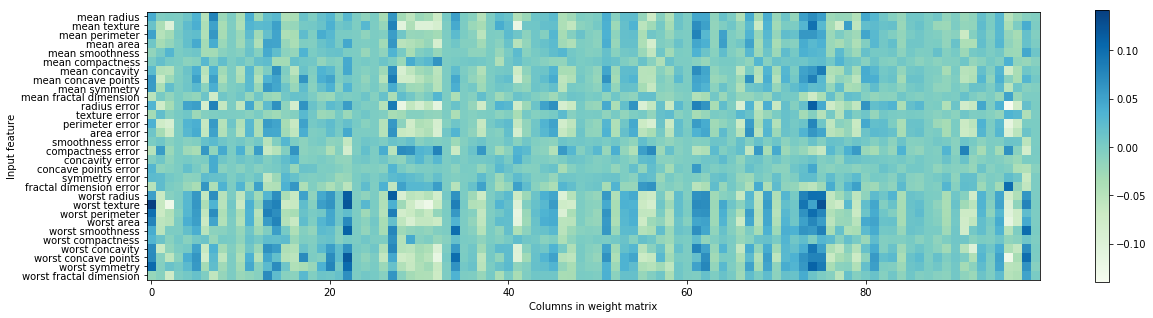

In [34]:
plt.figure(figsize=(20,5))

plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

Rows : 30 ip features

Cols: no of hidden units (100 in this case)

Features with v small wts across hidden units may be less imp

Bw smoothness error and fractal dimension error, these look like they dont play such an imp role in decsison making

Similar for mean smoothness and mean compactness

#### Advantages

- can be used to build very complex models over large datasets
- if u have high computaion power and time, good models can be built
- many parameters are available for tuning

#### Weaknesses

- many more params for tuning, some more complicated
- pre processing of data may be reqd. Especially if we use solver like 'adam' which is the default
- some solvers are scale sensitive

### Support Vector Machines (SVM)

- for classification and regression (SVC and SVR)
- can be applied to linear and non linear data
- looks for the best separating line or decision boundary
- looks for the largest margin

With LogReg we measured the dist bw all points

What SVM does is look for largest margin or dist bw points on the sides of the decision lines

These are Support Vectors


![](https://github.com/CristiVlad25/ml-sklearn/raw/cb2efc99a811421319a78bbb385fe0343e9990ed/SVM.png)

D1 could be a decision boundary for the 2 classes

But in thsi case D2 is the optimal choic since it maximises the dist bw the 2 closes class points

The idea is that the decision line to stay as far as possible from the training instances

 [**Understand SVM better**](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)
 
SVMs can also be trained on non linear data

When we use SVM on non linear data we are leveraging on a strategy called the **Kernel Trick**

#### Kernel Trick

Non Linear Classification: Data which is not separable by a st line

For eg:

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_8.png)

![](https://github.com/CristiVlad25/ml-sklearn/raw/cb2efc99a811421319a78bbb385fe0343e9990ed/SVM2.png)

Here we have just one feature (x1) in the 1st graph

The data is not linearly separable

If we add another feature x2 = x1^2 the data becomes linearly separable

We can use this for low complexity smaller datasets and we can apply a low polynomial degree

But when data becomes more complex and higher dimensional, that is when we can use a kernel

Kernel adds multiple polynomial features of very high degree without actually having to add them

In this way, we avoid computational complexity or burden that comes along with adding multiple features to the data

So its called a trick

- The Kernel Trick twists or warps the space in which our data is
- By doing this the algo is able to find a linear separation for the data
- Linear separation is within the warped space
- This linear sep becomes non linear when transposed or applied to the original non warped space
- Using kernels allows us to apply some sort of transformation to our data to change original ip space to a higher dimensional space in which we are able to find a linear separation for the data
- Then we take that to original space in which the separation becomes non linear but visible

Something like this:

![](https://github.com/CristiVlad25/ml-sklearn/raw/cb2efc99a811421319a78bbb385fe0343e9990ed/SVM3.png)

[Kernel Trick explanation](https://www.youtube.com/watch?v=3Xw6FKYP7e4)

#### Commonly Used Kernels:

- linear
- polynomial
- radical basis function (RBF) - Gaussian RBF
- sigmoid 


#### Udacity Kernel Trick Explanation

    x1, y (non linearly sep) -------------> (Kernels)   x1,x2,x3,x4,x5 (linearly sep)
    non linear separation    <--------------            Solution

In [35]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC()

svm.fit(x_train, y_train)


print ("Accuracy of SVM on the training set: {:.2f} %".format(svm.score(x_train, y_train)*100))

print ("Accuracy of SVM on the test set: {:.2f} %".format(svm.score(x_test, y_test)*100))

Accuracy of SVM on the training set: 100.00 %
Accuracy of SVM on the test set: 62.94 %


    We got 100% on training subset. This means we are overfitting
    
    Also the performance on the test subset is not too good
    
Possible ways to fix:

- scale the data 
- look into the Regularization Factor (C or gamma)

#### Inspecting the features

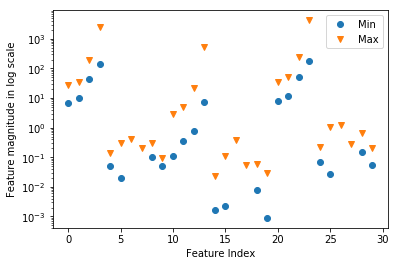

In [36]:
plt.plot(x_train.min(axis=0), 'o', label = 'Min')
plt.plot(x_train.max(axis=0), 'v', label = "Max")
plt.xlabel('Feature Index')
plt.ylabel('Feature magnitude in log scale')
plt.yscale('log')
plt.legend(loc = 'upper right')

There is variation in scale in some of the features. Let's fix this

There is an order of magnitude (10^1 -> 10^2 difference) in min and max of some of the features

That is not good


In [37]:
print(x_train)

print("----------------------------------------------")

min_train = x_train.min(axis=0)

print (min_train)

print("----------------------------------------------")

range_train = (x_train - min_train).max(axis=0)

print(range_train)

print("----------------------------------------------")

x_train_scaled = (x_train - min_train)/range_train

# Now min and max of each feature will be bw 0 & 1

print (x_train_scaled)

print("----------------------------------------------")

print ("Min per feature \n {}".format(x_train_scaled.min(axis=0)))
print ("Max per feature \n {}".format(x_train_scaled.max(axis=0)))

print("----------------------------------------------")

x_test_scaled = (x_test - min_train)/range_train

print (x_test_scaled)

print("----------------------------------------------")

print ("Min per feature \n {}".format(x_test_scaled.min(axis=0)))
print ("Max per feature \n {}".format(x_test_scaled.max(axis=0)))

print("----------------------------------------------")

[[  1.18500000e+01   1.74600000e+01   7.55400000e+01 ...,   9.14000000e-02
    3.10100000e-01   7.00700000e-02]
 [  1.12200000e+01   1.98600000e+01   7.19400000e+01 ...,   2.02200000e-02
    3.29200000e-01   6.52200000e-02]
 [  2.01300000e+01   2.82500000e+01   1.31200000e+02 ...,   1.62800000e-01
    2.57200000e-01   6.63700000e-02]
 ..., 
 [  9.43600000e+00   1.83200000e+01   5.98200000e+01 ...,   5.05200000e-02
    2.45400000e-01   8.13600000e-02]
 [  9.72000000e+00   1.82200000e+01   6.07300000e+01 ...,   0.00000000e+00
    1.90900000e-01   6.55900000e-02]
 [  1.15100000e+01   2.39300000e+01   7.45200000e+01 ...,   9.65300000e-02
    2.11200000e-01   8.73200000e-02]]
----------------------------------------------
[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   4.99600000e-02   1.11500000e-01   3.62800000e-01
   7.57000000e-01   7.22800000e+00   1.71300000e-03   2.25200000e-

In [38]:
svm = SVC()

svm.fit(x_train_scaled, y_train)

print ("Accuracy of SVM on the training set: {:.2f} %".format(svm.score(x_train_scaled, y_train)*100))

print ("Accuracy of SVM on the test set: {:.2f} %".format(svm.score(x_test_scaled, y_test)*100))

Accuracy of SVM on the training set: 94.84 %
Accuracy of SVM on the test set: 95.10 %


    Now performance looks better 
    
    There is a huge difference when we feed the SVM with scaled data rather than unscaled data
    
    But we are now underfitting

#### Scaling the test data a bit differently

In [39]:

min_test = x_test.min(axis=0)

print (min_test)

print("----------------------------------------------")

range_test = (x_test - min_test).max(axis=0)

print(range_test)

print("----------------------------------------------")

x_test_scaled = (x_test - min_test)/range_test

# Now min and max of each feature will be bw 0 & 1

print (x_test_scaled)

print("----------------------------------------------")

print ("Min per feature \n {}".format(x_test_scaled.min(axis=0)))
print ("Max per feature \n {}".format(x_test_scaled.max(axis=0)))

print("----------------------------------------------")

svm = SVC()

svm.fit(x_train_scaled, y_train)

print ("Accuracy of SVM on the training set: {:.2f} %".format(svm.score(x_train_scaled, y_train)*100))

print ("Accuracy of SVM on the test set: {:.2f} %".format(svm.score(x_test_scaled, y_test)*100))

[  7.72900000e+00   1.07200000e+01   4.79800000e+01   1.78800000e+02
   6.57600000e-02   3.39800000e-02   0.00000000e+00   0.00000000e+00
   1.20300000e-01   5.02400000e-02   1.14400000e-01   3.60200000e-01
   7.71400000e-01   6.80200000e+00   2.82600000e-03   3.74600000e-03
   0.00000000e+00   0.00000000e+00   1.01300000e-02   1.21700000e-03
   8.96400000e+00   1.24900000e+01   5.71700000e+01   2.42200000e+02
   8.40900000e-02   4.61900000e-02   0.00000000e+00   0.00000000e+00
   1.60300000e-01   5.86500000e-02]
----------------------------------------------
[  1.54810000e+01   2.85600000e+01   1.05520000e+02   1.49120000e+03
   9.76400000e-02   3.11420000e-01   4.26400000e-01   1.82300000e-01
   1.70300000e-01   4.47800000e-02   1.25560000e+00   3.28680000e+00
   1.02986000e+01   1.69698000e+02   2.83040000e-02   1.31654000e-01
   1.43800000e-01   4.09000000e-02   6.88200000e-02   2.07130000e-02
   2.20460000e+01   3.23800000e+01   1.49630000e+02   2.70180000e+03
   1.06110000e-01   

#### Adjusting parameters

Params:
- C
- gamma

Deafult value of c is 1

If we inc C it will lead to a **more complex** model

In [40]:
# Restoring the test values

x_test_scaled = (x_test - min_train)/range_train

svm = SVC(C=1000)

svm.fit(x_train_scaled, y_train)

print ("Accuracy of SVM on the training set: {:.2f} %".format(svm.score(x_train_scaled, y_train)*100))

print ("Accuracy of SVM on the test set: {:.2f} %".format(svm.score(x_test_scaled, y_test)*100))

Accuracy of SVM on the training set: 98.83 %
Accuracy of SVM on the test set: 97.20 %


    Now performance is much better
    
    We are not overfitting or underfitting]
    
    There is also a small but good separation bw the train and test accuracies

#### Advantages and Disadvantages of SVMs

Advantages:

- Versatility : They can do well on a wide range of datasets
- It does not matter much if ur dataset is characterized by only a few features as our SVM will be 
    able to draw complex decision boundaries inspite of this
- They can do well on high dimensional data provided the sample size is relatively small

Disadvantages

- for high dim data with large sample size(>100k) SVMsdont do that well.They do not scale well on hight dimensional data
- preprocessing may be reqd. So u need knowledge and understanding of the parameters
- so some people prefer RF and DT which require less preprocessing, easier to understand, inspect and visualize

